In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [52]:
nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]
print(nb.head())

                 name
0  Marshall-Shadeland
1    South Side Flats
2   South Side Slopes
3           Arlington
4       Lincoln Place


In [56]:
greenways = pd.read_csv('greenways.csv')
greenways = greenways['nhood'] # select only the neighborhood column
print(greenways)

# we want to count how many instances of each neighborhood are in features. 
# This will be essentially be a 'leaderboard' of water features
nb['greenways'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
print(nb.head())
for row in greenways:
    # get neighborhood index 

    print(row)
    inds = nb[nb.name == row]
    if len(inds):
        ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
        nb.loc[ind,'greenways'] += 1 # update accordingly
    
nb = nb.sort_values('greenways', ascending=False) # we sort by highest first
print(nb)

0              Beechview
1              Brookline
2    Squirrel Hill South
3            Perry South
4                    NaN
5            Perry North
6                    NaN
7          South Oakland
8                    NaN
9              Hazelwood
Name: nhood, dtype: object
                 name  greenways
0  Marshall-Shadeland          0
1    South Side Flats          0
2   South Side Slopes          0
3           Arlington          0
4       Lincoln Place          0
Beechview
Brookline
Squirrel Hill South
Perry South
nan


IndexError: index 0 is out of bounds for axis 0 with size 0

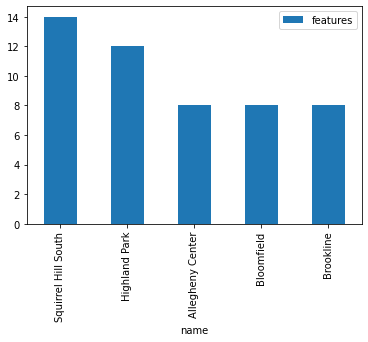

In [9]:
nb = nb.head()
nb.plot.bar(x='name')